In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sns

In [444]:
df = pd.read_csv('bmi_data_lab3.csv')

In [445]:
df.describe()

Age  Height (Inches)  Weight (Pounds)         BMI
count  150.000000       146.000000       150.000000  145.000000
mean    26.413333        80.133994       129.703405    2.751724
std      5.206071        96.579662        88.179891    0.449244
min     18.000000      -130.926162      -161.994913    1.000000
25%     22.000000        66.599597       120.391125    3.000000
50%     26.500000        68.219095       128.538050    3.000000
75%     31.000000        69.432848       136.170900    3.000000
max     35.000000       665.465059      1110.621115    3.000000

In [446]:
df.keys()

Index(['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'], dtype='object')

In [447]:
df.dtypes

Sex                 object
Age                  int64
Height (Inches)    float64
Weight (Pounds)    float64
BMI                float64
dtype: object

In [448]:
df.head()

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  Female   21         65.78331         112.9925  2.0
1  Female   35              NaN         136.4873  3.0
2  Female   27         69.39874         153.0269  3.0
3    Male   24         68.21660         142.3354  3.0
4  Female   18         67.78781         144.2971  3.0

In [449]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [450]:
df.columns

Index(['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'], dtype='object')

Text(0.5, 1.0, 'BMI=3 - Height')

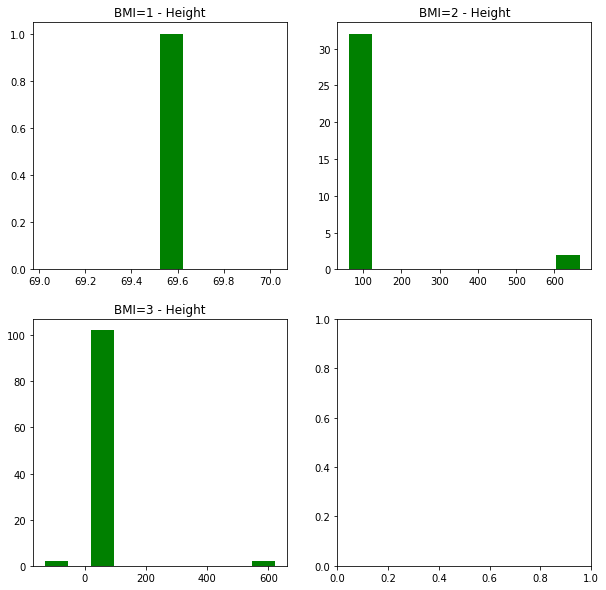

In [451]:
n_bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10,10))

histData = df[df["BMI"] == 1].filter(["Height (Inches)"])
axs[0,0].hist(histData.values, bins=n_bins, color="green")
axs[0,0].set_title("BMI=1 - Height")

histData = df[df["BMI"] == 2].filter(["Height (Inches)"])
axs[0,1].hist(histData.values, bins=n_bins, color="green")
axs[0,1].set_title("BMI=2 - Height")

histData = df[df["BMI"] == 3].filter(["Height (Inches)"])
axs[1,0].hist(histData.values, bins=n_bins, color="green")
axs[1,0].set_title("BMI=3 - Height")


Text(0.5, 1.0, 'BMI=3 - Weight')

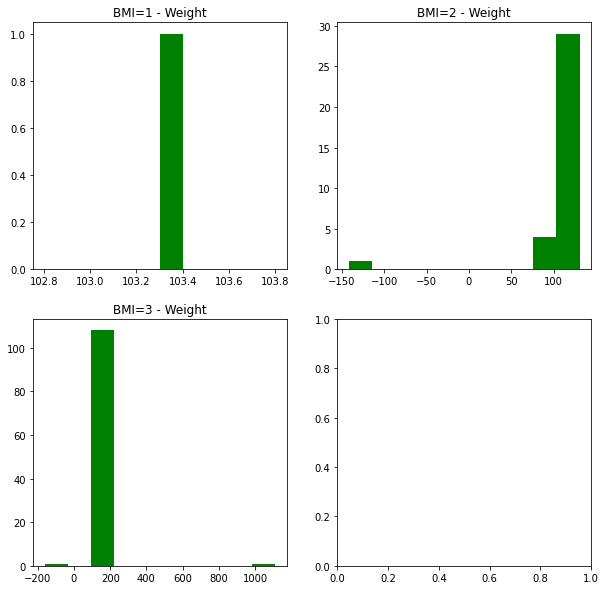

In [452]:
n_bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10,10))

histData = df[df["BMI"] == 1].filter(["Weight (Pounds)"])
axs[0,0].hist(histData.values, bins=n_bins, color="green")
axs[0,0].set_title("BMI=1 - Weight")

histData = df[df["BMI"] == 2].filter(["Weight (Pounds)"])
axs[0,1].hist(histData.values, bins=n_bins, color="green")
axs[0,1].set_title("BMI=2 - Weight")

histData = df[df["BMI"] == 3].filter(["Weight (Pounds)"])
axs[1,0].hist(histData.values, bins=n_bins, color="green")
axs[1,0].set_title("BMI=3 - Weight")

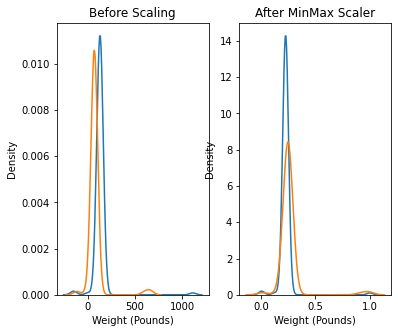

In [453]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[["Height (Inches)", "Weight (Pounds)"]])
scaled_df = pd.DataFrame(scaled_df, columns=["Height (Inches)", "Weight (Pounds)"])
columns=["Height (Inches)", "Weight (Pounds)"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Weight (Pounds)'], ax= ax1)
sns.kdeplot(df['Height (Inches)'], ax= ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_df['Weight (Pounds)'], ax= ax2)
sns.kdeplot(scaled_df['Height (Inches)'], ax= ax2)
plt.show()


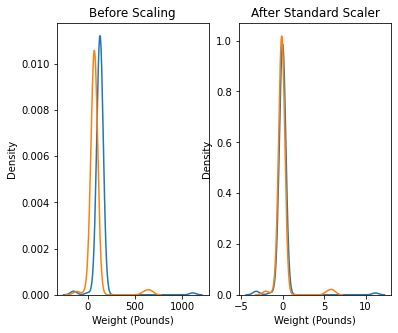

In [454]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[["Height (Inches)", "Weight (Pounds)"]])
scaled_df = pd.DataFrame(scaled_df, columns=["Height (Inches)", "Weight (Pounds)"])
columns=["Height (Inches)", "Weight (Pounds)"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Weight (Pounds)'], ax= ax1)
sns.kdeplot(df['Height (Inches)'], ax= ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Weight (Pounds)'], ax= ax2)
sns.kdeplot(scaled_df['Height (Inches)'], ax= ax2)
plt.show()


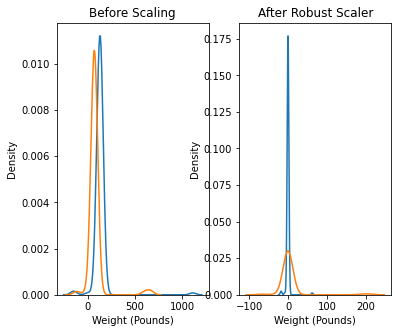

In [455]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = scaler.fit_transform(df[["Height (Inches)", "Weight (Pounds)"]])
scaled_df = pd.DataFrame(scaled_df, columns=["Height (Inches)", "Weight (Pounds)"])
columns=["Height (Inches)", "Weight (Pounds)"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Weight (Pounds)'], ax= ax1)
sns.kdeplot(df['Height (Inches)'], ax= ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(scaled_df['Weight (Pounds)'], ax= ax2)
sns.kdeplot(scaled_df['Height (Inches)'], ax= ax2)
plt.show()

In [456]:
for i in df['Height (Inches)']:
    if i<0 or i==0 or i>100 :
            df = df.replace(i,np.NaN)
            
for j in df['Weight (Pounds)']:
        if j<0 or j==0 :
            df = df.replace(j,np.NaN)

In [457]:
df.isnull().values.ravel().sum()

20

In [458]:
df.isna().sum()

Sex                 0
Age                 0
Height (Inches)    12
Weight (Pounds)     3
BMI                 5
dtype: int64

In [459]:
df[df.isna().any(axis=1)]

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
1    Female   35              NaN         136.4873  3.0
6      Male   35         69.80204         141.4947  NaN
9      Male   25              NaN         120.6672  3.0
10     Male   34              NaN         127.4516  NaN
17   Female   31              NaN         142.9733  3.0
33     Male   21              NaN         136.2225  3.0
41   Female   31              NaN         124.8591  3.0
47     Male   31              NaN         116.8190  2.0
48     Male   21         69.82117              NaN  NaN
54     Male   27         65.38356         123.4892  NaN
69   Female   26              NaN         124.7299  NaN
87   Female   27              NaN         131.5916  3.0
90   Female   22              NaN         136.5479  3.0
104  Female   18         67.75551              NaN  2.0
111    Male   34              NaN         127.6064  2.0
116    Male   23              NaN         132.6792  3.0
129  Female   33         70.24100              NaN  3.0

In [460]:
df_1=df.fillna(df.mean())
df_1

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0    Female   21        65.783310       112.992500  2.0
1    Female   35        68.045536       136.487300  3.0
2    Female   27        69.398740       153.026900  3.0
3      Male   24        68.216600       142.335400  3.0
4    Female   18        67.787810       144.297100  3.0
..      ...  ...              ...              ...  ...
145  Female   20        68.262090       116.458800  2.0
146  Female   28        68.568650       133.840200  3.0
147  Female   30        64.496750      1110.621115  3.0
148    Male   19        68.710530       130.756800  3.0
149    Male   25        68.891480       137.757100  3.0

[150 rows x 5 columns]

In [461]:
df_2= df.fillna(df.median())
df_2

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0    Female   21        65.783310       112.992500  2.0
1    Female   35        68.219095       136.487300  3.0
2    Female   27        69.398740       153.026900  3.0
3      Male   24        68.216600       142.335400  3.0
4    Female   18        67.787810       144.297100  3.0
..      ...  ...              ...              ...  ...
145  Female   20        68.262090       116.458800  2.0
146  Female   28        68.568650       133.840200  3.0
147  Female   30        64.496750      1110.621115  3.0
148    Male   19        68.710530       130.756800  3.0
149    Male   25        68.891480       137.757100  3.0

[150 rows x 5 columns]

In [462]:
df_3=df.fillna(method='ffill')
df_3

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0    Female   21         65.78331       112.992500  2.0
1    Female   35         65.78331       136.487300  3.0
2    Female   27         69.39874       153.026900  3.0
3      Male   24         68.21660       142.335400  3.0
4    Female   18         67.78781       144.297100  3.0
..      ...  ...              ...              ...  ...
145  Female   20         68.26209       116.458800  2.0
146  Female   28         68.56865       133.840200  3.0
147  Female   30         64.49675      1110.621115  3.0
148    Male   19         68.71053       130.756800  3.0
149    Male   25         68.89148       137.757100  3.0

[150 rows x 5 columns]

In [463]:
df_4=df.fillna(method='bfill')
df_4

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0    Female   21         65.78331       112.992500  2.0
1    Female   35         69.39874       136.487300  3.0
2    Female   27         69.39874       153.026900  3.0
3      Male   24         68.21660       142.335400  3.0
4    Female   18         67.78781       144.297100  3.0
..      ...  ...              ...              ...  ...
145  Female   20         68.26209       116.458800  2.0
146  Female   28         68.56865       133.840200  3.0
147  Female   30         64.49675      1110.621115  3.0
148    Male   19         68.71053       130.756800  3.0
149    Male   25         68.89148       137.757100  3.0

[150 rows x 5 columns]

In [464]:
df.head()

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  Female   21         65.78331         112.9925  2.0
1  Female   35              NaN         136.4873  3.0
2  Female   27         69.39874         153.0269  3.0
3    Male   24         68.21660         142.3354  3.0
4  Female   18         67.78781         144.2971  3.0

In [465]:
df['Height (Inches)'].interpolate(method='linear', inplace=True)

In [466]:
df['Weight (Pounds)'].interpolate(method='linear', inplace=True)

In [467]:
df.head()

Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  Female   21        65.783310         112.9925  2.0
1  Female   35        67.591025         136.4873  3.0
2  Female   27        69.398740         153.0269  3.0
3    Male   24        68.216600         142.3354  3.0
4  Female   18        67.787810         144.2971  3.0

In [468]:
y_pred = model.predict(df['Height (Inches)'].values.reshape(-1,1))
print('predicted response:', y_pred, sep='\n')
df['Weight (Pounds)'].replace(y_pred)


predicted response:
[[154.75715121]
 [141.16669884]
 [127.57624648]
 [136.46360835]
 [139.68726366]
 [132.84563245]
 [124.54422571]
 [122.94529147]
 [138.8238933 ]
 [139.52387185]
 [140.2238504 ]
 [140.92382894]
 [135.81796009]
 [144.7337401 ]
 [135.98944631]
 [114.84927725]
 [149.66225867]
 [131.73427993]
 [113.8063012 ]
 [144.62382652]
 [139.34158473]
 [131.48509489]
 [172.06485502]
 [134.9203827 ]
 [140.88841903]
 [144.04148006]
 [116.72314578]
 [141.8935794 ]
 [149.11336743]
 [157.3307978 ]
 [126.63980089]
 [154.53243734]
 [139.47307504]
 [124.48009693]
 [109.48711881]
 [129.0242939 ]
 [147.08598076]
 [140.65618714]
 [139.54291752]
 [167.82318351]
 [133.77192871]
 [129.69899934]
 [125.62606996]
 [138.3377776 ]
 [153.27181437]
 [133.03621447]
 [146.50558899]
 [135.45299741]
 [124.40040583]
 [129.9111205 ]
 [123.69656803]
 [143.11540935]
 [121.03067522]
 [129.79632021]
 [157.76248298]
 [121.66910618]
 [120.00235932]
 [149.04006665]
 [150.39015416]
 [141.57286032]
 [149.33763021]
 [13

0       112.992500
1       136.487300
2       153.026900
3       142.335400
4       144.297100
          ...     
145     116.458800
146     133.840200
147    1110.621115
148     130.756800
149     137.757100
Name: Weight (Pounds), Length: 150, dtype: float64

In [469]:

model = LinearRegression()
model.fit(df['Height (Inches)'].values.reshape(-1,1),df['Weight (Pounds)'].values.reshape(-1,1))
y_pred = model.predict(df['Height (Inches)'].values.reshape(-1,1))
r_sq = model.score(df['Height (Inches)'].values.reshape(-1,1),df['Weight (Pounds)'].values.reshape(-1,1))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
# The coefficients
#print('Coefficients: \n', model.coef_)
# The mean squared error
#print('Mean squared error: %.2f'% sklearn.metrics.mean_squared_error(df['Height (Inches)'].values.reshape(-1,1),df['Weight (Pounds)'].values.reshape(-1,1)))
# The coefficient of determination: 1 is perfect prediction
#print('Coefficient of determination: %.2f'% sklearn.metrics.r2_score(df['Height (Inches)'].values.reshape(-1,1),df['Weight (Pounds)'].values.reshape(-1,1)))


coefficient of determination: 0.0062708663858696
intercept: [372.08637606]
slope: [[-3.49398522]]


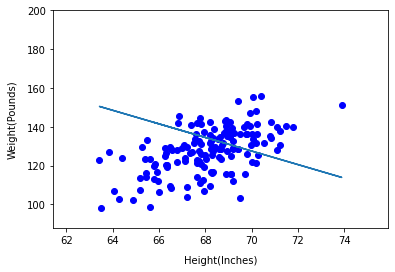

In [470]:
plt.scatter(df['Height (Inches)'],df['Weight (Pounds)'],  color='blue')

plt.plot(df['Height (Inches)'],model.predict(df['Height (Inches)'].values.reshape(-1,1)))


plt.xlabel('Height(Inches)', labelpad=10)
plt.ylabel('Weight(Pounds)', labelpad=10)

plt.axis([min(df['Height (Inches)']-2),max(df['Height (Inches)']+2) , min( df['Weight (Pounds)'])-10,200])

plt.show()

In [471]:
Female=df[df["Sex"] == 'Female']
Male=df[df["Sex"] == 'Male']
BMI_1=df[df["BMI"] == 1]
BMI_2=df[df["BMI"] == 2]
BMI_3=df[df["BMI"] == 3]

Coefficients: 
 [[-7.51802821]]
Mean squared error: 16236.18
Coefficient of determination: -4555.54


<ipython-input-472-2be32559ea68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Female['Height (Inches)'].interpolate(method='linear', inplace=True)
<ipython-input-472-2be32559ea68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Female['Weight (Pounds)'].interpolate(method='linear', inplace=True)


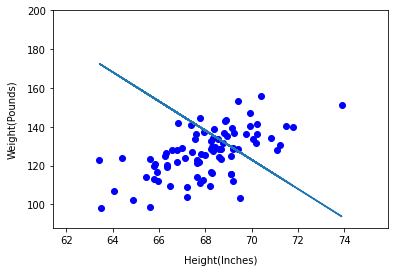

In [472]:
Female['Height (Inches)'].interpolate(method='linear', inplace=True)
Female['Weight (Pounds)'].interpolate(method='linear', inplace=True)

model = LinearRegression()
model.fit(Female['Height (Inches)'].values.reshape(-1,1),Female['Weight (Pounds)'].values.reshape(-1,1))
y_pred = model.predict(Female['Height (Inches)'].values.reshape(-1,1))
r_sq = model.score(Female['Height (Inches)'].values.reshape(-1,1),Female['Weight (Pounds)'].values.reshape(-1,1))
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% sklearn.metrics.mean_squared_error(Female['Height (Inches)'].values.reshape(-1,1),Female['Weight (Pounds)'].values.reshape(-1,1)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% sklearn.metrics.r2_score(Female['Height (Inches)'].values.reshape(-1,1),Female['Weight (Pounds)'].values.reshape(-1,1)))

plt.scatter(Female['Height (Inches)'], Female['Weight (Pounds)'],  color='blue')
plt.plot(Female['Height (Inches)'],model.predict(Female['Height (Inches)'].values.reshape(-1,1)))
plt.xlabel('Height(Inches)', labelpad=10)
plt.ylabel('Weight(Pounds)', labelpad=10)

plt.axis([min(Female['Height (Inches)']-2),max(Female['Height (Inches)']+2) , min(Female['Weight (Pounds)'])-10,200])


plt.show()

Coefficients: 
 [[3.04256322]]
Mean squared error: 3814.77
Coefficient of determination: -1243.63


<ipython-input-473-eb9dfd3e523a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Male['Height (Inches)'].interpolate(method='linear', inplace=True)
<ipython-input-473-eb9dfd3e523a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Male['Weight (Pounds)'].interpolate(method='linear', inplace=True)


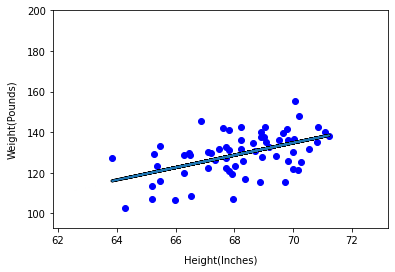

In [473]:
Male['Height (Inches)'].interpolate(method='linear', inplace=True)
Male['Weight (Pounds)'].interpolate(method='linear', inplace=True)
model = LinearRegression()
model.fit(Male['Height (Inches)'].values.reshape(-1,1),Male['Weight (Pounds)'].values.reshape(-1,1))
y_pred = model.predict(Male['Height (Inches)'].values.reshape(-1,1))
r_sq = model.score(Male['Height (Inches)'].values.reshape(-1,1),Male['Weight (Pounds)'].values.reshape(-1,1))
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% sklearn.metrics.mean_squared_error(Male['Height (Inches)'].values.reshape(-1,1),Male['Weight (Pounds)'].values.reshape(-1,1)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% sklearn.metrics.r2_score(Male['Height (Inches)'].values.reshape(-1,1),Male['Weight (Pounds)'].values.reshape(-1,1)))

plt.scatter(Male['Height (Inches)'], Male['Weight (Pounds)'],  color='blue')
plt.plot(Male['Height (Inches)'],y_pred, color='black', linewidth=3)
plt.xlabel('Height(Inches)', labelpad=10)
plt.ylabel('Weight(Pounds)', labelpad=10)

plt.axis([min(Male['Height (Inches)']-2),max(Male['Height (Inches)']+2) , min(Male['Weight (Pounds)'])-10,200])

plt.plot(Male['Height (Inches)'],model.predict(Male['Height (Inches)'].values.reshape(-1,1)))
plt.show()

Coefficients: 
 [[0.]]
Mean squared error: 1140.97
Coefficient of determination: nan


<ipython-input-474-04cb17e2db20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMI_1['Height (Inches)'].interpolate(method='linear', inplace=True)
<ipython-input-474-04cb17e2db20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMI_1['Weight (Pounds)'].interpolate(method='linear', inplace=True)
c:\users\melis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\melis\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metri

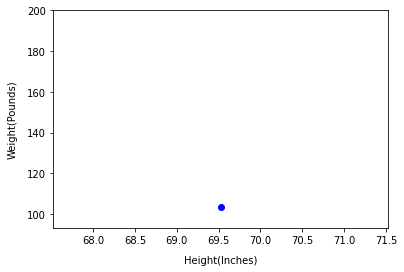

In [474]:
BMI_1['Height (Inches)'].interpolate(method='linear', inplace=True)
BMI_1['Weight (Pounds)'].interpolate(method='linear', inplace=True)
model = LinearRegression()
model.fit(BMI_1['Height (Inches)'].values.reshape(-1,1),BMI_1['Weight (Pounds)'].values.reshape(-1,1))
y_pred = model.predict(BMI_1['Height (Inches)'].values.reshape(-1,1))
r_sq = model.score(BMI_1['Height (Inches)'].values.reshape(-1,1),BMI_1['Weight (Pounds)'].values.reshape(-1,1))
# The coefficients
print('Coefficients: \n', model.coef_)

#UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
# The mean squared error
print('Mean squared error: %.2f'% sklearn.metrics.mean_squared_error(BMI_1['Height (Inches)'].values.reshape(-1,1),BMI_1['Weight (Pounds)'].values.reshape(-1,1)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% sklearn.metrics.r2_score(BMI_1['Height (Inches)'].values.reshape(-1,1),BMI_1['Weight (Pounds)'].values.reshape(-1,1)))

plt.scatter(BMI_1['Height (Inches)'],BMI_1['Weight (Pounds)'],  color='blue')
plt.plot(BMI_1['Height (Inches)'],y_pred, color='black', linewidth=3)
plt.xlabel('Height(Inches)', labelpad=10)
plt.ylabel('Weight(Pounds)', labelpad=10)

plt.axis([min(BMI_1['Height (Inches)']-2),max(BMI_1['Height (Inches)']+2) , min(BMI_1['Weight (Pounds)'])-10,200])

plt.plot(BMI_1['Height (Inches)'],model.predict(BMI_1['Height (Inches)'].values.reshape(-1,1)))
plt.show()

Coefficients: 
 [[3.48050785]]
Mean squared error: 2124.37
Coefficient of determination: -545.00


<ipython-input-475-024141c4d4d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMI_2['Height (Inches)'].interpolate(method='linear', inplace=True)
<ipython-input-475-024141c4d4d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMI_2['Weight (Pounds)'].interpolate(method='linear', inplace=True)


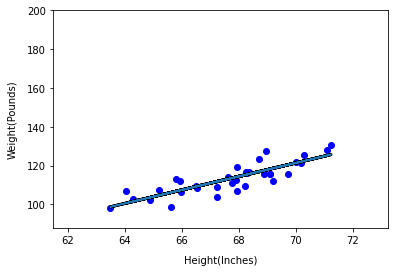

In [475]:
BMI_2['Height (Inches)'].interpolate(method='linear', inplace=True)
BMI_2['Weight (Pounds)'].interpolate(method='linear', inplace=True)
model = LinearRegression()
model.fit(BMI_2['Height (Inches)'].values.reshape(-1,1),BMI_2['Weight (Pounds)'].values.reshape(-1,1))
y_pred = model.predict(BMI_2['Height (Inches)'].values.reshape(-1,1))
r_sq = model.score(BMI_2['Height (Inches)'].values.reshape(-1,1),BMI_2['Weight (Pounds)'].values.reshape(-1,1))
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% sklearn.metrics.mean_squared_error(BMI_2['Height (Inches)'].values.reshape(-1,1),BMI_2['Weight (Pounds)'].values.reshape(-1,1)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% sklearn.metrics.r2_score(BMI_2['Height (Inches)'].values.reshape(-1,1),BMI_2['Weight (Pounds)'].values.reshape(-1,1)))

plt.scatter(BMI_2['Height (Inches)'],BMI_2['Weight (Pounds)'],  color='blue')
plt.plot(BMI_2['Height (Inches)'],y_pred, color='black', linewidth=3)
plt.xlabel('Height(Inches)', labelpad=10)
plt.ylabel('Weight(Pounds)', labelpad=10)

plt.axis([min(BMI_2['Height (Inches)']-2),max(BMI_2['Height (Inches)']+2) , min(BMI_2['Weight (Pounds)'])-10,200])

plt.plot(BMI_2['Height (Inches)'],model.predict(BMI_2['Height (Inches)'].values.reshape(-1,1)))
plt.show()

Coefficients: 
 [[-7.5070714]]
Mean squared error: 14076.73
Coefficient of determination: -4480.04


<ipython-input-476-337dc14f68a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMI_3['Height (Inches)'].interpolate(method='linear', inplace=True)
<ipython-input-476-337dc14f68a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BMI_3['Weight (Pounds)'].interpolate(method='linear', inplace=True)


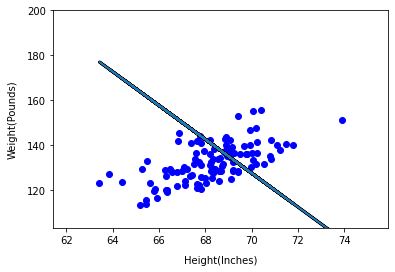

In [476]:
BMI_3['Height (Inches)'].interpolate(method='linear', inplace=True)
BMI_3['Weight (Pounds)'].interpolate(method='linear', inplace=True)
model = LinearRegression()
model.fit(BMI_3['Height (Inches)'].values.reshape(-1,1),BMI_3['Weight (Pounds)'].values.reshape(-1,1))
y_pred = model.predict(BMI_3['Height (Inches)'].values.reshape(-1,1))
r_sq = model.score(BMI_3['Height (Inches)'].values.reshape(-1,1),BMI_3['Weight (Pounds)'].values.reshape(-1,1))
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% sklearn.metrics.mean_squared_error(BMI_3['Height (Inches)'].values.reshape(-1,1),BMI_3['Weight (Pounds)'].values.reshape(-1,1)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% sklearn.metrics.r2_score(BMI_3['Height (Inches)'].values.reshape(-1,1),BMI_3['Weight (Pounds)'].values.reshape(-1,1)))

plt.scatter(BMI_3['Height (Inches)'],BMI_3['Weight (Pounds)'],  color='blue')
plt.plot(BMI_3['Height (Inches)'],y_pred, color='black', linewidth=3)
plt.xlabel('Height(Inches)', labelpad=10)
plt.ylabel('Weight(Pounds)', labelpad=10)

plt.axis([min(BMI_3['Height (Inches)']-2),max(BMI_3['Height (Inches)']+2) , min(BMI_3['Weight (Pounds)'])-10,200])

plt.plot(BMI_3['Height (Inches)'],model.predict(BMI_3['Height (Inches)'].values.reshape(-1,1)))
plt.show()